In [1]:
import os
from pathlib import Path

import qcodes
from qcodes.dataset import (
    LinSweep,
    TogetherSweep,
    do1d,
    do2d,
    dond,  
    Measurement,
    load_or_create_experiment,
    plot_dataset,
    initialise_or_create_database_at
)

import datetime

import numpy as np

import scipy

import time

import matplotlib.pyplot as plt

## Measuring Current Pre-Amp Bias

In [2]:
# Load in Station
station = qcodes.Station(config_file='../station_config.yml')
station.load_instrument('sim900')
station.load_instrument('agilent')

c:\Users\coher\Documents\GitHub\QuantumDotControl\.venv\lib\site-packages\qcodes\station.py:483: ValidationWarning: Additional properties are not allowed ('general_info' was unexpected)

Failed validating 'additionalProperties' in schema:
    {'$schema': 'http://json-schema.org/draft-07/schema#',
     'additionalProperties': False,
     'definitions': {'instruments': {'enum': ['']},
                     'parameter_base': {'$comment': 'A common base for the '
                                                    'properties shared by '
                                                    "'add_parameters' and "
                                                    "'parameters' can "
                                                    'first be implemented '
                                                    'with the new '
                                                    'json-schema draft '
                                                    '2019-09, for which '
                      

Connected to: Stanford_Research_Systems SIM900 (serial:s/n130900, firmware:ver3.6) in 1.73s
Connected to: HEWLETT-PACKARD 34401A (serial:0, firmware:11-5-3) in 0.05s


<Agilent34401A: agilent>

In [ ]:
import sys

def query_yes_no(question, default="yes"):
    """Ask a yes/no question via raw_input() and return their answer.

    "question" is a string that is presented to the user.
    "default" is the presumed answer if the user just hits <Enter>.
            It must be "yes" (the default), "no" or None (meaning
            an answer is required of the user).

    The "answer" return value is True for "yes" or False for "no".
    """
    valid = {"yes": True, "y": True, "ye": True, "no": False, "n": False}
    if default is None:
        prompt = " [y/n] "
    elif default == "yes":
        prompt = " [Y/n] "
    elif default == "no":
        prompt = " [y/N] "
    else:
        raise ValueError("invalid default answer: '%s'" % default)

    while True:
        sys.stdout.write(question + prompt)
        choice = input().lower()
        if default is not None and choice == "":
            return valid[default]
        elif choice in valid:
            return valid[choice]
        else:
            sys.stdout.write("Please respond with 'yes' or 'no' " "(or 'y' or 'n').\n")

In [3]:
# preamp_bias_exp = load_or_create_experiment('Current PreAmp-2 Bias Experiment', sample_name='10MOhm Resistor')

In [4]:
# VI_sweep = Measurement(exp=preamp_bias_exp)

In [5]:
# # Record independent variable
# VI_sweep.register_parameter(station.sim900.volt_1)
# # Record dependent variable (setpoints implies dependency)
# VI_sweep.register_parameter(station.agilent.volt, setpoints=[station.sim900.volt_1])

# dV = 1e-3 # min resolution
# volt_min, volt_max = -10e-3, 10e-3
# voltage_sweep = np.arange(volt_min, volt_max, dV) # sweep values
# station.sim900.set_smooth({1: volt_min}) # smoothly ramp to start point

# with VI_sweep.run() as datasaver:
#     for voltage in voltage_sweep:
#         station.sim900.volt_1.set(voltage) # set voltage (mV)
#         datasaver.add_result(
#             (station.sim900.volt_1, station.sim900.volt_1()),
#             (station.agilent.volt, station.agilent.volt())
#             ) # record measurement
        
# station.sim900.set_smooth({1: 0}) # smoothly ramp to 0V after measurement
# dataset = datasaver.dataset

In [6]:
# df = dataset.to_pandas_dataframe().reset_index()

# df_current = df.copy()
# df_current = df_current.rename(columns={'agilent_volt': 'agilent_current'})
# df_current.iloc[:,1] = df_current.iloc[:,1].mul(-1e-6) # sensitivity

# V = df_current['sim900_volt_1'] # V
# I = df_current['agilent_current'] # A

# def linear(x, m, b):
#     return m * x + b

# fit_params, pcov = scipy.optimize.curve_fit(linear, xdata=V, ydata=I, p0=(1, 0))

# G, IBias = fit_params

# R = 1/G

# print("Resistance is {:3f} M\u03A9".format(R/1e6))
# print("Y-Intercept is (0 mV, {:3f} nA)".format(IBias/1e-9))
# print("X-Intercept is ({:3f} mV, 0 nA)".format((-IBias/G) / 1e-3))

# axes = df_current.plot.scatter(y='agilent_current', x='sim900_volt_1', linewidth=1, s=20, label=r'$I_{\text{RAW}}$')
# axes.axhline(y=0, color='k', alpha=0.25, linestyle='--')
# axes.axvline(x=0, color='k', alpha=0.25, linestyle='--')
# axes.scatter([0],[IBias], s=45, marker='x', c='r', label='Current Bias: {:.3f} nA'.format(IBias/1e-9))
# axes.set_ylabel(r'$I$ (A)')
# axes.set_xlabel(r'$V_{\text{SIM900}}$ (V)')
# axes.set_title('CSG Current PreAmp-2 Bias')

# df_current_nobias = df_current.copy()
# # subtract the bias
# df_current_nobias.iloc[:,1] = df_current_nobias.iloc[:,1].subtract(IBias)
# axes.scatter(df_current_nobias['sim900_volt_1'], df_current_nobias['agilent_current'], color='k', s=20, label=r'$I_{\text{CORRECTED}}$')
# axes.legend(loc='best')

## 0. Set-up the Dataset

In [7]:
def exp_fit(x, a, b, x0, y0):
    return a * np.exp(b * (x-x0)) + y0

def sigmoid_fit(x, a, b, x0, y0):
    return a/(1+np.exp(b * (x-x0))) + y0

In [8]:
today_date = datetime.date.today().strftime("%Y-%m-%d")
db_file = f"~/experiments_{today_date}.db"
initialise_or_create_database_at(db_file)

In [9]:
# import IPython.lib.backgroundjobs as bg
# from plottr.apps import inspectr

# jobs = bg.BackgroundJobManager()
# jobs.new(inspectr.main, db_file)

In [10]:
device_info = {}
initialization_exp = load_or_create_experiment('Initialization', sample_name='SET N44')

In [11]:
station.sim900.set_smooth({
    'S': 0,
    'LB': 0,
    'RB': 0,
    'STR':0
})
station.sim900.print_readable_snapshot()

sim900:
	parameter      value
--------------------------------------------------------------------------------
IDN             :	{'vendor': 'Stanford_Research_Systems', 'model': 'SIM900', ...
IDN_7           :	{'vendor': 'Stanford_Research_Systems', 'model': 'SIM928', ...
IDN_8           :	{'vendor': 'Stanford_Research_Systems', 'model': 'SIM928', ...
IDN_LB          :	{'vendor': 'Stanford_Research_Systems', 'model': 'SIM928', ...
IDN_P           :	{'vendor': 'Stanford_Research_Systems', 'model': 'SIM928', ...
IDN_RB          :	{'vendor': 'Stanford_Research_Systems', 'model': 'SIM928', ...
IDN_S           :	{'vendor': 'Stanford_Research_Systems', 'model': 'SIM928', ...
IDN_STL         :	{'vendor': 'Stanford_Research_Systems', 'model': 'SIM928', ...
IDN_STR         :	{'vendor': 'Stanford_Research_Systems', 'model': 'SIM928', ...
smooth_timestep :	0.05 (s)
timeout         :	10 (s)
volt_7          :	0 (V)
volt_7_step     :	0.005 (V)
volt_8          :	0 (V)
volt_8_step     :	0.005 (V)
volt

In [12]:
# Bias the device
station.sim900.set_smooth({
    'LB': 0,
    'RB': 0,
    'STR': 0
})  

sensitivity = 1e-7 # A/V

# ASSUMING YOU HAVE SOME SORT OF VOLTAGE DIVIDER!!
VBias = 0.1 # V

abs_max_current_threshold = 30.0e-9
abs_min_current_threshold = 0.5 * abs_max_current_threshold

station.sim900.set_smooth({'S': VBias})

# TECHNICALLY SHOULD BE MEASURED BEFORE EVERYTIME
preamp_bias = 0 # V

## 1. Global Turn On

In [13]:
def fit_data():

    # Get last dataset (presumably the last measurement done) and convert from voltage to current values
    dataset = qcodes.load_last_experiment().last_data_set()
    df = dataset.to_pandas_dataframe().reset_index()
    print(df)
    df_current = df.copy()
    df_current = df_current.rename(columns={'agilent_volt': 'agilent_current'})
    df_current.iloc[:,-1] = df_current.iloc[:,-1].subtract(preamp_bias).mul(sensitivity) # sensitivity

    # Plot current v.s. random gate (since they are swept together)
    axes = df_current.plot.scatter(y='agilent_current', x='sim900_volt_LB',marker= 'o',s=10)
    df_current.plot.line(y='agilent_current', x='sim900_volt_LB', ax=axes, linewidth=1)
    axes.axhline(y=np.sign(df_current['agilent_current'].iloc[-1])*abs_min_current_threshold, alpha=0.5,c='g', linestyle=':', label=r'$I_{\min}$')
    axes.axhline(y=np.sign(df_current['agilent_current'].iloc[-1])*abs_max_current_threshold, alpha=0.5,c='g', linestyle='--', label=r'$I_{\max}$')
 
    axes.set_ylabel(r'$I$ (A)')
    axes.set_xlabel(r'$V_{GATES}$ (V)')
    axes.set_title('Global Turn-On')


    # Start fitting relevant current to extract turn on value
    mask = df_current['agilent_current'].abs() > abs_min_current_threshold 
    X_thres = df_current['sim900_volt_LB'][mask]
    Y_thres = df_current['agilent_current'][mask]

    guess = (-max(Y_thres), 0.5, min(X_thres), max(Y_thres))
    try:

        fit_params, fit_cov = scipy.optimize.curve_fit(exp_fit, X_thres, Y_thres, guess)
        # Extract relevant data from fit params
        a, b, x0, y0 = fit_params
        V_turn_on =  round(np.log(-y0/a)/b + x0,3)
        V_sat = df_current['sim900_volt_LB'].iloc[-2] # Saturation is the last voltage on the gates

        # Plot / print results to user
        axes.plot(X_thres, exp_fit(X_thres, a,b,x0,y0), 'r-')
        axes.axvline(x=V_turn_on, alpha=0.5, linestyle=':',c='b',label=r'$V_{\min}$')
        axes.axvline(x=V_sat,alpha=0.5, linestyle='--',c='b',label=r'$V_{\max}$')
        plt.legend(loc='best')

        print("Turn on: ", V_turn_on, "V")
        print("Saturation Voltage: ", V_sat, "V")
        print("Global Turn On Distance: ", V_sat - V_turn_on, "V")

        # Store in device dictionary for later
        device_info['Turn On'] = V_turn_on
        device_info['Saturation'] = V_sat
        device_info['Turn On Distance'] = round(V_sat - V_turn_on, 3)

    except RuntimeError:
        print("Error - curve_fit failed. Manually adjust device info.")
    
        isTurnOn = query_yes_no("Did the device turn-on?")
        if isTurnOn:
            V_turn_on = input("What was the turn on voltage (V)?")
            V_sat = input("What was the saturation voltage (V)?")
            # Store in device dictionary for later
            device_info['Turn On'] = V_turn_on
            device_info['Saturation'] = V_sat
            device_info['Turn On Distance'] = round(V_sat - V_turn_on, 3)

 
def max_current():
    # Stop measurement if current exceeds maximum
    I = sensitivity * (station.agilent.volt() - preamp_bias)
    I_threshold = abs_max_current_threshold # A

    return np.abs(I) > I_threshold

Starting experimental run with id: 56. Using 'qcodes.dataset.dond'


  0%|          | 0/141 [00:00<?, ?it/s]

    sim900_volt_LB  sim900_volt_RB  sim900_volt_STR  agilent_volt
0            1.300           1.300            1.300     -0.001241
1            1.305           1.305            1.305     -0.001392
2            1.310           1.310            1.310     -0.001383
3            1.315           1.315            1.315     -0.001416
4            1.320           1.320            1.320     -0.001518
..             ...             ...              ...           ...
95           1.775           1.775            1.775     -0.273782
96           1.780           1.780            1.780     -0.282486
97           1.785           1.785            1.785     -0.288492
98           1.790           1.790            1.790     -0.296280
99           1.795           1.795            1.795     -0.294015

[100 rows x 4 columns]


An exception occurred in measurement with guid: 42cae02e-0000-0000-0000-018f2b8a1c3b;
Traceback:
Traceback (most recent call last):
  File "c:\Users\coher\Documents\GitHub\QuantumDotControl\.venv\lib\site-packages\qcodes\dataset\dond\do_nd.py", line 753, in dond
    raise BreakConditionInterrupt("Break condition was met.")
qcodes.dataset.dond.do_nd_utils.BreakConditionInterrupt: Break condition was met.

Measurement has been interrupted, data may be incomplete: Break condition was met.


Turn on:  1.61 V
Saturation Voltage:  1.79 V
Global Turn On Distance:  0.17999999999999994 V


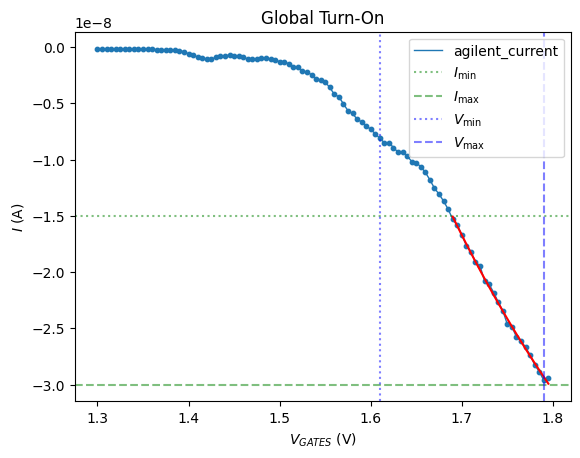

In [14]:
min_V = 1.3 # V

station.sim900.set_smooth({
    'LB': min_V,
    'RB': min_V,
    'STR': min_V
})

max_V = 2 # V
dV = 0.005 # V
N = int(np.abs(max_V-min_V) / dV) + 1

# sweep_STL = LinSweep(station.sim900.volt_STL, 0, max_V, N, 0.01, get_after_set=True)
# sweep_P = LinSweep(station.sim900.volt_P, 0, max_V, N, 0.01, get_after_set=True)
sweep_LB = LinSweep(station.sim900.volt_LB, min_V, max_V, N, 0.01, get_after_set=True)
sweep_RB = LinSweep(station.sim900.volt_RB, min_V, max_V, N, 0.01, get_after_set=True)
sweep_STR = LinSweep(station.sim900.volt_STR, min_V, max_V, N, 0.01, get_after_set=True)

# order of sweep matters
gate_sweeps = [
    # sweep_STL,
    sweep_LB, 
    sweep_RB, 
    sweep_STR,
    # sweep_P, 

]

result = dond(
    TogetherSweep(
        *gate_sweeps
    ), 
    station.agilent.volt, 
    write_period=0.1,
    break_condition=max_current,
    exit_actions=[fit_data],
    measurement_name='Global Turn On',
    exp=initialization_exp,
    show_progress=True
) # Return result: A tuple of QCoDeS DataSet, Matplotlib axis, Matplotlib colorbar.

In [16]:
print(device_info)
device_info['LB'] = {}
device_info['RB'] = {}
device_info['STR'] = {}

{'Turn On': 1.61, 'Saturation': 1.79, 'Turn On Distance': 0.18, 'LB': {}, 'RB': {}, 'STR': {}}


## 2. Individual Pinch-Offs

Pinching off STR
Starting experimental run with id: 57. Using 'qcodes.dataset.dond'


  0%|          | 0/111 [00:00<?, ?it/s]

An exception occurred in measurement with guid: d0f41ffb-0000-0000-0000-018f2b8b14d4;
Traceback:
Traceback (most recent call last):
  File "c:\Users\coher\Documents\GitHub\QuantumDotControl\.venv\lib\site-packages\qcodes\dataset\dond\do_nd.py", line 753, in dond
    raise BreakConditionInterrupt("Break condition was met.")
qcodes.dataset.dond.do_nd_utils.BreakConditionInterrupt: Break condition was met.

Measurement has been interrupted, data may be incomplete: Break condition was met.


Fit function: sigmoid_fit
Width of sigmoid: 0.92 V
STR Pinch off: 1.264 V
STR
Pinching off LB
Starting experimental run with id: 58. Using 'qcodes.dataset.dond'


  0%|          | 0/111 [00:00<?, ?it/s]

Error - curve_fit failed. Manually adjust device info.
LB
Pinching off RB
Starting experimental run with id: 59. Using 'qcodes.dataset.dond'


  0%|          | 0/111 [00:00<?, ?it/s]

c:\Users\coher\Documents\GitHub\QuantumDotControl\.venv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Fit function: sigmoid_fit
Width of sigmoid: 0.652 V
RB Pinch off: 1.284 V
RB


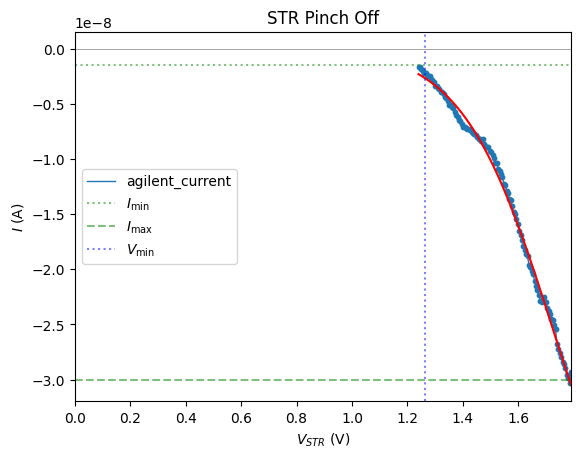

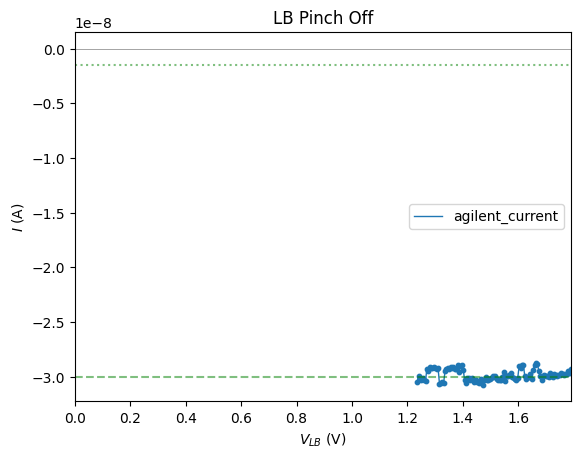

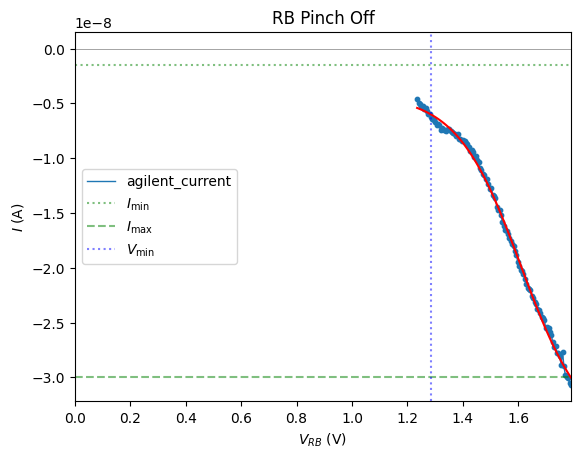

In [17]:
station.sim900.set_smooth({
    'LB': device_info['Saturation'],
    'RB': device_info['Saturation'],
    'STR': device_info['Saturation']
})


def fit_data():
    # Load last measurement & convert to current
    dataset = qcodes.load_last_experiment().last_data_set()
    df = dataset.to_pandas_dataframe().reset_index()

    df_current = df.copy()
    df_current = df_current.rename(columns={'agilent_volt': 'agilent_current'})
    df_current.iloc[:,-1] = df_current.iloc[:,-1].subtract(preamp_bias).mul(sensitivity) # sensitivity

    # Plot current v.s. param being swept
    axes = df_current.plot.scatter(y='agilent_current', x=f'{str(sweep._param)}', marker= 'o',s=10)
    df_current.plot.line(y='agilent_current', x=f'{str(sweep._param)}',  ax=axes, linewidth=1)
    axes.axhline(y=0,  alpha=.5, linewidth=0.5, c='k', linestyle='-')
    axes.axvline(x=0, alpha=.5, linewidth=0.5, c='k', linestyle='-')
    axes.set_ylabel(r'$I$ (A)')
    axes.set_xlabel(r'$V_{{{gate}}}$ (V)'.format(gate=str(sweep._param).split('_')[-1]))
    axes.set_title('{} Pinch Off'.format(str(sweep._param).split('_')[-1]))
    axes.set_xlim(0, device_info['Saturation'])
    axes.axhline(y=np.sign(df_current['agilent_current'].iloc[-1])*abs_min_current_threshold / 10, alpha=0.5,c='g', linestyle=':', label=r'$I_{\min}$')
    axes.axhline(y=np.sign(df_current['agilent_current'].iloc[-1])*abs_max_current_threshold, alpha=0.5,c='g', linestyle='--', label=r'$I_{\max}$')
        

    # Fit and get fit params
    X = df_current[f'{str(sweep._param)}']
    Y = df_current['agilent_current']

    try: 

        guess = (-5e-9,-100,device_info['Turn On'],5e-9)
        fit_params, fit_cov = scipy.optimize.curve_fit(sigmoid_fit, X, Y, guess)
        a, b, x0, y0 = fit_params

        plt.plot(X, sigmoid_fit(X, a,b,x0,y0), 'r-')

        V_pinchoff = round(min(
            np.abs(x0 - np.sqrt(8) / b),
            np.abs(x0 + np.sqrt(8) / b)
        ),3)
        V_pinchoff_width = abs(round(2 * np.sqrt(8) / b,3))

        axes.axvline(x=V_pinchoff, alpha=0.5, linestyle=':', c='b', label=r'$V_{\min}$')
        axes.legend(loc='best')

        device_info[str(sweep._param).split('_')[-1]]['Pinch Off'] = V_pinchoff
        device_info[str(sweep._param).split('_')[-1]]['Width'] = V_pinchoff_width #V

        print(f"Fit function: {sigmoid_fit.__name__}")
        print(f"Width of sigmoid: {V_pinchoff_width} V")
        print(f"{str(sweep._param).split('_')[-1]} Pinch off: {V_pinchoff} V")
    
    except RuntimeError:
        print("Error - curve_fit failed. Manually adjust device info.")

def min_current():
    I = sensitivity * (station.agilent.volt() - preamp_bias)

    I_threshold = abs_min_current_threshold / 10# A
    return np.abs(I) < I_threshold
    
max_differential = 0.75

max_V = device_info['Saturation']
min_V = device_info['Turn On'] - 0.5 * max_differential

assert abs(max_V - min_V) < max_differential, "Max differential"

N = int(np.abs(max_V-min_V) / dV) + 1
# sweep_STL = LinSweep(station.sim900.volt_STL, max_V, 0, N, 0.01, get_after_set=True)
# sweep_P = LinSweep(station.sim900.volt_P, max_V, 0, N, 0.01, get_after_set=True)
sweep_LB = LinSweep(station.sim900.volt_LB, max_V, min_V, N, 0.01, get_after_set=False)
sweep_RB = LinSweep(station.sim900.volt_RB, max_V, min_V, N, 0.01, get_after_set=False)
sweep_STR = LinSweep(station.sim900.volt_STR, max_V, min_V, N, 0.01, get_after_set=False)

gate_sweeps = [
    # sweep_STL,
    # sweep_P, 
    sweep_STR,
    sweep_LB, 
    sweep_RB,
]

for sweep in (gate_sweeps):
    print(f"Pinching off {str(sweep._param).split('_')[-1]}")
    pinch_off = dond(
        sweep,
        station.agilent.volt, 
        break_condition=min_current,
        exit_actions=[fit_data],
        measurement_name='{} Pinch Off'.format(str(sweep._param).split('_')[-1]),
        exp=initialization_exp,
        show_progress=True
    )
    print(str(sweep._param).split('_')[-1])
    station.sim900.set_smooth({str(sweep._param).split('_')[-1]: max_V})

In [ ]:
print(device_info)

## 3. Barrier Barrier Sweep

In [ ]:
station.sim900.set_smooth({'STR': device_info['Saturation']})
station.sim900.set_smooth({'LB': device_info['Saturation']})
station.sim900.set_smooth({'RB': device_info['Saturation']})


max_V = device_info['Saturation']
dV = 0.008
N1 = int(np.abs(max_V-device_info['LB']['Pinch Off']) / dV) + 1
N2 = int(np.abs(max_V-device_info['RB']['Pinch Off']) / dV) + 1

sweep_LB = LinSweep(station.sim900.volt_LB, max_V,device_info['LB']['Pinch Off'],  N1, 0.01, get_after_set=False)
sweep_RB = LinSweep(station.sim900.volt_RB, max_V, device_info['RB']['Pinch Off'],N2, 0.01, get_after_set=False)

def inference_model():
    # Once BB sweep has been completed, inference the CSD model to extract whether there are any single dot locations
    # of high enough accuracy
    dataset = qcodes.load_last_experiment().last_data_set()
    df = dataset.to_pandas_dataframe().reset_index()

    df_current = df.copy()
    df_current = df_current.rename(columns={'agilent_volt': 'agilent_current'})
    df_current.iloc[:,-1] = df_current.iloc[:,-1].subtract(preamp_bias).mul(sensitivity) # sensitivity

    X, Y, Z = df_current.columns[:3]
    raw_numpy_data = df_current.pivot_table(values=Z, index=[X], columns=[Y])
    Xdata, Ydata = raw_numpy_data.columns, raw_numpy_data.index
    raw_numpy_data = raw_numpy_data.to_numpy()[:,:-1] / 1e-9
    h_grad = np.gradient(raw_numpy_data, axis=0)
    v_grad = np.gradient(raw_numpy_data, axis=1)

    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.suptitle("Barrier Barrier Sweep")


    cbar_ax1 = plt.colorbar(ax1.imshow(
        raw_numpy_data,
        extent=[Xdata[0], Xdata[-1], Ydata[0], Ydata[-1]],
        origin='lower',
        cmap='coolwarm'
    ), ax=ax1)
    cbar_ax1.set_label(r'$I_{SD}$ (nA)')
    ax1.set_title(r'$I_{SD}$')
    ax1.set_xlabel(r"$V_{RB}$ (V)")
    ax1.set_ylabel(r"$V_{LB}$ (V)")

    cbar_ax2 = plt.colorbar(ax2.imshow(
        np.sqrt(h_grad**2 + v_grad**2),
        extent=[Xdata[0], Xdata[-1], Ydata[0], Ydata[-1]],
        origin='lower',
        cmap='coolwarm'
    ), ax=ax2)
    cbar_ax2.set_label(r'$\nabla I_{SD}$ (nA/V)')
    ax2.set_title(r'$\nabla I_{SD}$')
    ax2.set_xlabel(r"$V_{RB}$ (V)")
    ax2.set_ylabel(r"$V_{LB}$ (V)")

    fig.tight_layout()
    # raw_numpy_data = raw_numpy_data.values

def device_blow_up():
    # Stop measurement if current exceeds maximum
    I = sensitivity * (station.agilent.volt() - preamp_bias)
    I_threshold = 1.1 * abs_max_current_threshold # A

    return np.abs(I) > I_threshold

BB_sweep = dond(
    sweep_LB,
    sweep_RB,
    station.agilent.volt, 
    show_progress=True, 
    break_condition=device_blow_up,
    exit_actions=[inference_model],
    measurement_name='Barrier Barrier Sweep',
    exp=initialization_exp
)

In [ ]:
# SET BASED ON IMAGE ABOVE
device_info['LB']['Optimal'] = 1.4
device_info['RB']['Optimal'] = 1.37

In [ ]:
device_info

## 4. Coulomb Oscillations

In [ ]:
station.sim900.set_smooth({'LB': device_info['LB']['Optimal']})
station.sim900.set_smooth({'RB': device_info['RB']['Optimal']})
station.sim900.set_smooth({'STR': device_info['Saturation']})

V_max = device_info['Saturation'] 
V_min = device_info['Saturation'] - 0.5 * max_differential
dV = 0.007
N = int(np.abs(max_V-V_min) / dV) + 1

sweep_STR = LinSweep(station.sim900.volt_STR, V_max, V_min, N, 0.01, get_after_set=True)

def plot():
    # Check for enough colomb oscillations
    dataset = qcodes.load_last_experiment().last_data_set()
    df = dataset.to_pandas_dataframe().reset_index()

    df_current = df.copy()
    df_current = df_current.rename(columns={'agilent_volt': 'agilent_current'})
    df_current.iloc[:,-1] = df_current.iloc[:,-1].subtract(preamp_bias).mul(sensitivity) # sensitivity

    # Plot current v.s. random gate (since they are swept together)
    axes = df_current.plot.scatter(y='agilent_current', x='sim900_volt_STR', linewidth=1, s=20)
    axes.set_ylabel(r'$I$ (A)')
    axes.set_xlabel(r'$V_{STR}$ (V)')
    axes.set_title('Coulomb Oscillations')


BB_sweep = dond(
    sweep_STR,
    station.agilent.volt, 
    exit_actions=[plot],
    break_condition=device_blow_up,
    measurement_name='Coulomb Oscillations',
    exp=initialization_exp,
    show_progress=True
)

## 5. Coulomb Diamonds

In [ ]:
station.sim900.set_smooth({'STR': device_info['Saturation']})
station.sim900.set_smooth({'LB': device_info['LB']['Optimal']})
station.sim900.set_smooth({'RB': device_info['RB']['Optimal']})

V_max = device_info['Saturation'] 
V_min = device_info['Saturation'] - 0.5 * max_differential

dV = 0.007
N_acc = int(np.abs(max_V-V_min) / dV) + 1

dV = 0.005
N_bias = int(np.abs(VBias) / dV) + 1
sweep_STR = LinSweep(station.sim900.volt_STR, V_max, V_min, N_acc, 0.01, get_after_set=False)
# sweep_P = LinSweep(station.sim900.volt_P, 0, device_info['Saturation'], N, 0.01, get_after_set=True)
sweep_S = LinSweep(station.sim900.volt_S, VBias, -VBias, N_bias, 0.01, get_after_set=False)

def plot():
    # Once BB sweep has been completed, inference the CSD model to extract whether there are any single dot locations
    # of high enough accuracy
    dataset = qcodes.load_last_experiment().last_data_set()
    df = dataset.to_pandas_dataframe().reset_index()

    df_current = df.copy()
    df_current = df_current.rename(columns={'agilent_volt': 'agilent_current'})
    df_current.iloc[:,-1] = df_current.iloc[:,-1].subtract(preamp_bias).mul(sensitivity) # sensitivity

    X, Y, Z = df_current.columns[:3]
    raw_numpy_data = df_current.pivot_table(values=Z, index=[X], columns=[Y])
    Xdata, Ydata = raw_numpy_data.columns, raw_numpy_data.index
    raw_numpy_data = raw_numpy_data.to_numpy()[:,:-1] / 1e-9
    h_grad = np.gradient(raw_numpy_data, axis=0)
    v_grad = np.gradient(raw_numpy_data, axis=1)

    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.suptitle("Coulomb Diamonds")


    cbar_ax1 = plt.colorbar(ax1.imshow(
        raw_numpy_data,
        extent=[Xdata[0], Xdata[-1], Ydata[0], Ydata[-1]],
        origin='lower',
        cmap='coolwarm'
    ), ax=ax1)
    cbar_ax1.set_label(r'$I_{SD}$ (nA)')
    ax1.set_title(r'$I_{SD}$')
    ax1.set_xlabel(r"$V_{SD}$ (V)")
    ax1.set_ylabel(r"$V_{STR}$ (V)")

    cbar_ax2 = plt.colorbar(ax2.imshow(
        np.sqrt(h_grad**2 + v_grad**2),
        extent=[Xdata[0], Xdata[-1], Ydata[0], Ydata[-1]],
        origin='lower',
        cmap='coolwarm'
    ), ax=ax2)
    cbar_ax2.set_label(r'$\nabla I_{SD}$ (nA/V)')
    ax2.set_title(r'$\nabla I_{SD}$')
    ax1.set_xlabel(r"$V_{SD}$ (V)")
    ax1.set_ylabel(r"$V_{STR}$ (V)")

    fig.tight_layout()
    # raw_numpy_data = raw_numpy_data.values

CD_sweep = dond(
    sweep_STR,
    sweep_S,
    station.agilent.volt, 
    # do_plot=True
    show_progress=True, 
    # use_threads=True,
    break_condition=device_blow_up,
    exit_actions=[plot],
    measurement_name='Coulomb Diamonds',
    exp=initialization_exp
)

In [ ]:
device_info['STR']['Optimal'] = 1.4

## 6. Current Noise Spectrum

In [ ]:
station.sim900.set_smooth({'STR': device_info['STR']['Optimal']})
station.sim900.set_smooth({'LB': device_info['LB']['Optimal']})
station.sim900.set_smooth({'RB': device_info['RB']['Optimal']})

f_sampling = 1000 # Hz
dt_sampling = 1 / f_sampling
t_capture = 1 * 60  # seconds

num_of_samples = f_sampling * t_capture 

meas = Measurement(exp=initialization_exp)
meas.register_parameter(station.agilent.timetrace)
NPLC = None
station.agilent.NPLC(NPLC)
station.agilent.timetrace_dt(dt_sampling)
station.agilent.timetrace_npts(num_of_samples)

print(f'Minimal allowable dt: {station.agilent.sample.timer_minimum()} s')

with meas.run() as datasaver:
    datasaver.add_result((station.agilent.timetrace, station.agilent.timetrace()),
                        (station.agilent.time_axis, station.agilent.time_axis()))

time_trace_ds = datasaver.dataset
axs, cbs = qcodes.dataset.plot_dataset(time_trace_ds)

## 7. Reset Device Voltages

In [18]:
station.sim900.set_smooth({
    'S': 0,
    'STL': 0,
    'LB': 0,
    'P': 0,
    'RB': 0,
    'STR':0
})

# IGNORE BELOW, EXPERIMENTATION!

In [ ]:

# Define a function to generate response variable y based on the given formula
def current(X):
    y = (1/(1+np.exp(20*X[:,0]-5))) + (1/(1+np.exp(20*X[:,1]-5))) + 0.01 * np.random.randn(len(X[:,0]))
    return y

def P_peak(X):
    """
    Generate a Gaussian peak centered at (1, 1).

    Parameters:
        X (array-like): Array of 2D coordinates.

    Returns:
        array-like: Values of the Gaussian peak at the given coordinates.
    """
    # Center of the Gaussian peak
    peak_center = np.array([0.25, .25])

    # Width of the Gaussian peak (adjust as needed)
    sigma = 0.1

    # Calculate the squared distance from each point to the peak center
    dist_sq = np.sum((X - peak_center)**2, axis=1)

    # Evaluate the Gaussian peak
    peak_values = np.exp(-dist_sq / (2 * sigma**2))

    return peak_values

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import chaospy as cp
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, Matern
from scipy.spatial import Delaunay

# Set the number of points in the sequence
num_points = 200

distribution = cp.Iid(cp.Uniform(0, 1), 2)
samples = distribution.sample(num_points, rule="sobol")

X = samples.T


# Plot the path on the 2D plot
plt.figure(figsize=(8, 6))
# plt.scatter(Xold[:, 0], Xold[:, 1], c=yold, cmap='viridis', label='Data')

plt.scatter(X[:, 0], X[:, 1], c=current(X), cmap='viridis', label='Data')
# plt.plot(path_points[:, 0], path_points[:, 1], color='red', label='Path')
# plt.scatter(sample_point[0], sample_point[1], color='red', label='Sample Point')
# plt.scatter(X_pred[:, 0], X_pred[:, 1], c=y_pred_peak, cmap='viridis', alpha=0.15, label='Predictions')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Test Points')
plt.colorbar(label='Response (y)')
plt.legend()
plt.show()


# Generate synthetic data with response based on the given formula
y = current(X)

# Define the threshold for minimum y value
threshold = 0.05

# List to store indices of points to keep
indices_to_keep = []

# Iterate through each point in samples
for i in range(X.shape[0]):
    # Calculate the path along the line connecting the origin to the (X, Y) point
    path = np.linspace(0, 1, num_points)
    path_points = X[i] * path[:, None]

    # Evaluate the path for y
    path_y = current(path_points)
    plt.plot(path_y)

    # Calculate the minimum value of y along the path
    min_y = np.min(path_y)

    # Check if the minimum value of y is below the threshold
    if min_y <= threshold:
            # Find the index of the last element greater than or equal to the threshold
        index = len(path_y) - np.argmax(path_y[::-1] >= threshold) 

        # Trim the array
        path_y = path_y[:index+1]
        # Find the index of the first point below the threshold
        index_below_threshold = np.argwhere(path_y<threshold).max()

        # Set the sample point (X, Y) to the coordinates of that point
        X[i] = path_points[index_below_threshold]
        y[i] = path_y[index_below_threshold]
    # else:
        indices_to_keep.append(i)

# Keep only the sample points with minimum y below the threshold
Xold = X
yold = y
X = X[indices_to_keep]
y = y[indices_to_keep]


# Define the Gaussian process kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
kernel = Matern(nu=5/2)

# Create Gaussian process regressor
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=100)
gp_peak = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

gp_peak.fit(X,P_peak(X))

# Fit the Gaussian process model to the data
gp.fit(X, y)
print(X,y)

# Define grid of points to predict over
x1 = np.linspace(0, 1, 50)
x2 = np.linspace(0, 1, 50)
X_pred = np.array(np.meshgrid(x1, x2)).T.reshape(-1, 2)

# Make predictions with the Gaussian process model
y_pred, sigma = gp.predict(X_pred, return_std=True)
y_pred_peak, sigma = gp_peak.predict(X_pred, return_std=True)

# Normalize the predicted values between 0 and 1
y_pred_normalized = (y_pred - np.min(y_pred)) / (np.max(y_pred) - np.min(y_pred))

distribution = cp.Iid(cp.Uniform(0, 1), 2)
samples = distribution.sample(1000, rule="sobol").T
# Iterate through each point in samples
indices_to_keep = []
for i in range(samples.shape[0]):
    predicted = gp.predict([samples[i]])
    if (predicted - np.min(y_pred))/(np.max(y_pred) - np.min(y_pred))> 0.5 and (predicted - np.min(y_pred))/(np.max(y_pred) - np.min(y_pred)) < 0.75:
        indices_to_keep.append(i)
# for i in range(samples.shape[0]):
#     predicted = gp_peak.predict([samples[i]])
#     if (predicted - np.min(y_pred_peak))/(np.max(y_pred_peak) - np.min(y_pred))> 0.55 :
#         indices_to_keep.append(i)

good_samples = samples[indices_to_keep]


# Select one sample point
sample_index = 2
sample_point = X[sample_index]

# Define the number of points along the path
num_path_points = 100

# Calculate the path along the line connecting the origin to the sample point
path = np.linspace(0, 1, num_path_points)
path_points = sample_point * path[:, None]

# Calculate the corresponding y values along the path
path_y = current(path_points)

# Plot the path on the 2D plot
plt.figure(figsize=(8, 6))
# plt.scatter(Xold[:, 0], Xold[:, 1], c=yold, cmap='viridis', label='Data')

plt.scatter(X[:, 0], X[:, 1], c=P_peak(X), cmap='viridis', label='Data')
plt.plot(path_points[:, 0], path_points[:, 1], color='red', label='Path')
plt.scatter(sample_point[0], sample_point[1], color='red', label='Sample Point')
plt.scatter(X_pred[:, 0], X_pred[:, 1], c=y_pred_peak, cmap='viridis', alpha=0.15, label='Predictions')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Coulomb Peak Probability')
plt.colorbar(label='Response (y)')
plt.legend()
plt.show()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', label='Data')
plt.plot(path_points[:, 0], path_points[:, 1], color='red', label='Path')
plt.scatter(sample_point[0], sample_point[1], color='red', label='Sample Point')
plt.scatter(X_pred[:, 0], X_pred[:, 1], c=y_pred, cmap='viridis', alpha=0.15, label='Predictions')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Path along the Line Connecting Origin to Sample Point')
plt.colorbar(label='Response (y)')
plt.legend()
plt.show()

# Plot the path on the 2D plot
plt.figure(figsize=(8, 6))
plt.scatter(good_samples[:, 0], good_samples[:, 1], label='Test Points')
plt.scatter(X_pred[:, 0], X_pred[:, 1], c=y_pred_normalized, cmap='viridis', alpha=0.15, label='Predictions')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Points to vary plunger gate at to detect any coloumb oscillations')
plt.colorbar(label='Response (y)')
plt.legend()
plt.show()

# Plot the response y along the path
plt.figure(figsize=(8, 6))
plt.plot(path, path_y, color='blue')
plt.xlabel('Path')
plt.ylabel('Response (y)')
plt.title('Response Variable (y) along the Path')
plt.grid(True)
plt.show()


In [ ]:
gp = GaussianProcessRegressor(kernel=Matern(nu=5/2), alpha=1, n_restarts_optimizer=10, normalize_y=True)
# X = np.concatenate((X, [[1,0],[1,0.1],[1,0.2],[1,0.3]]))
# X = np.concatenate((X, [[0,1],[0.1,1],[0.2,1],[0.3,1]]))
print(X)
gp.fit(np.atleast_2d(X[:,0]).T, X[:,1])
x = np.linspace(0.,1,100)
# plt.plot(x,f(x))
y_pred, sigma = gp.predict(np.atleast_2d(x).T, return_std=True)
plt.scatter(X[:, 0], X[:, 1], label='Data')
plt.plot(x,y_pred)
plt.fill_between(x, y_pred- 1.96 * sigma, y_pred + 1.96 * sigma,alpha=0.5)

random_x = np.random.rand(1)
samples = gp.sample_y(np.atleast_2d(random_x).T, n_samples=1)

plt.scatter(np.atleast_2d(random_x).T,samples)
plt.show()